# Importación de librerías

In [1]:
import pandas as pd
import numpy as np

import os
import librosa
import librosa.display

import matplotlib.pyplot as plt
import seaborn as sns

import mlflow


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Lectura del dataset

In [3]:
urbansound8k_path = "../../data/raw/UrbanSound8K/"

# Primer dataset - Carpeta con los audios
urbansound8k_audio_path = "audio/"

# Segundo dataset - Archivo CSV con metadatos sobre los audios
urbansound8k_metadata_path_file = "metadata/UrbanSound8K.csv" 

# Dataset input
dataset_urbansound8k_vfinal_path_file = "../../data/processed/pd01_transformaciones_v2.csv"


In [4]:
# Lectura
dataset_urbansound8k_df = pd.read_csv(dataset_urbansound8k_vfinal_path_file, sep=";")

dataset_urbansound8k_df.head(3)

,slice_file_name,fold,classID,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,...,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12,mfcc_std_13
0,100032-3-0-0.wav,5,3,-275.91843,119.49280,-98.21178,-66.515140,-42.606050,0.505066,-28.330938,...,7.711867,20.805027,9.134558,18.894438,6.147139,6.089511,5.562755,8.565537,6.207259,6.475474
1,100263-2-0-117.wav,5,2,-500.90840,185.10641,-86.53282,49.858850,9.230822,22.548956,-3.567175,...,7.905810,10.492388,8.088639,10.003834,8.190908,7.428165,8.623438,8.925406,6.448639,8.688373
2,100263-2-0-121.wav,5,2,-531.19530,186.93994,-70.34916,40.429245,9.121047,18.398588,6.283282,...,8.959305,12.224772,6.729685,6.964815,7.970478,8.061611,6.219080,6.053109,5.661677,6.233405


In [5]:
print("Columnas del dataset:")
print(dataset_urbansound8k_df.columns)
print("---")

print(f"Cantidad de columnas: {dataset_urbansound8k_df.shape[1]}")
print(f"Cantidad de filas: {dataset_urbansound8k_df.shape[0]}")

Columnas del dataset:
Index(['slice_file_name', 'fold', 'classID', 'mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13', 'mfcc_median_1',
       'mfcc_median_2', 'mfcc_median_3', 'mfcc_median_4', 'mfcc_median_5',
       'mfcc_median_6', 'mfcc_median_7', 'mfcc_median_8', 'mfcc_median_9',
       'mfcc_median_10', 'mfcc_median_11', 'mfcc_median_12', 'mfcc_median_13',
       'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5',
       'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10',
       'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13'],
      dtype='object')
---
Cantidad de columnas: 42
Cantidad de filas: 5702


# Generación datos de entrenamiento y prueba

In [6]:
# Separar las características y la variable objetivo
# ['tasa_cruce_cero', 'entropia_espectograma', 'avg_centroide_espectral'
columnas_caracteristicas = ['mfcc_mean_1', 'mfcc_mean_2',
       'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6',
       'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10',
       'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13', 'mfcc_median_1',
       'mfcc_median_2', 'mfcc_median_3', 'mfcc_median_4', 'mfcc_median_5',
       'mfcc_median_6', 'mfcc_median_7', 'mfcc_median_8', 'mfcc_median_9',
       'mfcc_median_10', 'mfcc_median_11', 'mfcc_median_12', 'mfcc_median_13',
       'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5',
       'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10',
       'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13']

columna_predecir = 'classID'
columna_fold = 'fold'

# Separar las características y etiquetas
X = dataset_urbansound8k_df[columnas_caracteristicas]  # Suponiendo que 'classID' es la etiqueta y 'fold' el número de fold
y = dataset_urbansound8k_df[columna_predecir]
folds = dataset_urbansound8k_df['fold']

# Modelos de Clasificacion

In [7]:
# Iniciar el experimento en MLflow
mlflow.set_experiment("Clasificación sonidos urbanos GridSearchCV 2")

2024/09/13 17:33:47 INFO mlflow.tracking.fluent: Experiment with name 'Clasificación sonidos urbanos GridSearchCV 2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/colbe/Documents/VIU/TFM/tfm-clasificador-fuentes-sonoras-ciudad/notebooks/modelado/mlruns/314528442053815625', creation_time=1726266827465, experiment_id='314528442053815625', last_update_time=1726266827465, lifecycle_stage='active', name='Clasificación sonidos urbanos GridSearchCV 2', tags={}>

## KNeighborsClassifier

Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mejor Score: 0.6990157480314961
Fold 1 Accuracy: 0.6383


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Mejor Score: 0.6747372596426278
Fold 2 Accuracy: 0.6953


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Mejor Score: 0.6875882919520547
Fold 3 Accuracy: 0.5271


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Mejor Score: 0.6893577877677458
Fold 4 Accuracy: 0.5842


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Mejor Score: 0.6955658903720534
Fold 5 Accuracy: 0.6425


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Mejor Score: 0.6726177457391329
Fold 6 Accuracy: 0.6291


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Mejor Score: 0.6980071394965012
Fold 7 Accuracy: 0.6768


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Mejor Score: 0.6770873786407767
Fold 8 Accuracy: 0.6522


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Mejor Score: 0.667298110935501
Fold 9 Accuracy: 0.7509


Mejores Parámetros: {'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}
Mejor Score: 0.69376597568283
Fold 10 Accuracy: 0.6056



Accuracy promedio: 0.6402
Desviación estándar: 0.0583


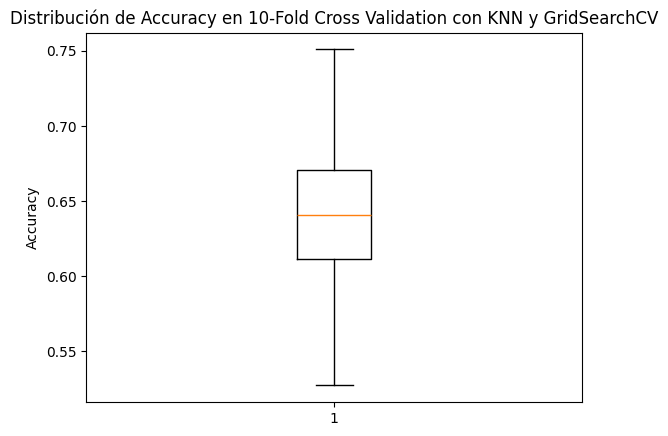

In [8]:
# Escalar los datos (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo KNN
knn = KNeighborsClassifier()

# Definir la rejilla de parámetros para GridSearchCV
param_grid = {
    'n_neighbors': [7,8,9,16,17,18],  # Número de vecinos a considerar
    'weights': ['distance'],  # Función de peso a usar
    'metric': ['euclidean', 'minkowski']  # Métrica de distancia
}

# Inicializar lista para almacenar accuracies
fold_accuracies = []

# Realizar la validación cruzada respetando los folds predefinidos
for fold in range(1, 11):  # Hay 10 folds en UrbanSound8K
    # Dividir el dataset en entrenamiento y prueba
    train_index = folds != fold
    test_index = folds == fold
    
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]    

    with mlflow.start_run(run_name=f"KNN GSCV Fold_{fold}") as run:

        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=knn, 
            param_grid=param_grid, 
            cv=10,  # Validación cruzada interna con 10 pliegues
            scoring='accuracy',  # Métrica para optimizar
            n_jobs=-1  # Usar todos los núcleos disponibles
        )

        # Entrenar el modelo con la búsqueda de hiperparámetros
        grid_search.fit(X_train, y_train)

        # Obtener el mejor modelo
        best_knn = grid_search.best_estimator_

        # Obtener los mejores parámetros y el mejor score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_    
        
        # Predecir y evaluar
        y_pred = best_knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)
        
        print(f"Mejores Parámetros: {best_params}")
        print(f"Mejor Score: {best_score}")        
        print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_params(best_params)

        #mlflow.log_metric(f"best_cv_score_fold_{fold}", best_score)
        # Registrar la métrica de accuracy de este fold
        mlflow.log_metric(f"accuracy_score", accuracy)

        # Guardar el modelo en MLflow con un ejemplo de entrada
        input_example = X_test[:1]  # Ejemplo de entrada, una sola muestra de prueba
        mlflow.sklearn.log_model(best_knn, f"knn_model_fold_{fold}", input_example=input_example)

        # Se finaliza el registro
        mlflow.end_run()


# Mostrar el promedio y desviación estándar
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nAccuracy promedio: {mean_accuracy:.4f}")
print(f"Desviación estándar: {std_accuracy:.4f}")



# Opcional: Visualizar los resultados con un boxplot
plt.boxplot(fold_accuracies)
plt.title('Distribución de Accuracy en 10-Fold Cross Validation con KNN y GridSearchCV')
plt.ylabel('Accuracy')
plt.show()


In [9]:
mlflow.end_run()

## Random Forest

Mejores Parámetros: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}
Mejor Score: 0.7454724409448819
Fold 1 Accuracy: 0.7267


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 450}
Mejor Score: 0.7297699369120925
Fold 2 Accuracy: 0.7258


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mejor Score: 0.7251345401174168
Fold 3 Accuracy: 0.5542


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}
Mejor Score: 0.7274553284726683
Fold 4 Accuracy: 0.5412


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mejor Score: 0.7356598504212819
Fold 5 Accuracy: 0.6833


Mejores Parámetros: {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Mejor Score: 0.7156240468379197
Fold 6 Accuracy: 0.6913


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 450}
Mejor Score: 0.737833356982293
Fold 7 Accuracy: 0.6939


Mejores Parámetros: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Mejor Score: 0.7165048543689321
Fold 8 Accuracy: 0.6304


Mejores Parámetros: {'bootstrap': False, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}
Mejor Score: 0.7041751335892226
Fold 9 Accuracy: 0.8055


Mejores Parámetros: {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 450}
Mejor Score: 0.7426900584795322
Fold 10 Accuracy: 0.7201



Accuracy promedio: 0.6772
Desviación estándar: 0.0771


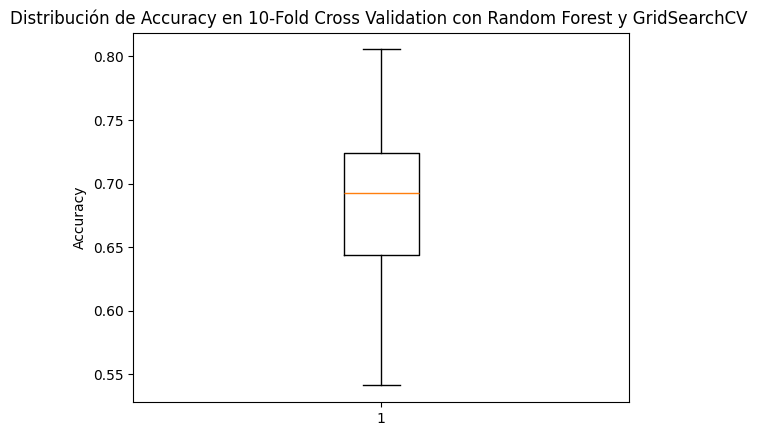

In [10]:
# Escalar los datos (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir la rejilla de parámetros para GridSearchCV
param_grid = {
    'n_estimators': [450, 500, 550],  # Número de árboles en el bosque
    'max_depth': [20, 25, 30],  # Máxima profundidad de cada árbol
    'min_samples_split': [2, 3],  # Mínimo número de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2],  # Mínimo número de muestras requeridas en una hoja
    'max_features': ['log2'],  # Número de características a considerar al buscar la mejor división
    'bootstrap': [True, False]  # Método para seleccionar muestras para construir cada árbol
}

# Inicializar lista para almacenar accuracies
fold_accuracies = []

# Realizar la validación cruzada respetando los folds predefinidos
for fold in range(1, 11):  # Hay 10 folds en UrbanSound8K
    # Dividir el dataset en entrenamiento y prueba
    train_index = folds != fold
    test_index = folds == fold
    
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    with mlflow.start_run(run_name=f"RandomForest GSCV Fold_{fold}") as run:

        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=rf, 
            param_grid=param_grid, 
            cv=10,  # Validación cruzada interna con 10 pliegues
            scoring='accuracy',  # Métrica para optimizar
            n_jobs=-1  # Usar todos los núcleos disponibles
        )

        # Entrenar el modelo con la búsqueda de hiperparámetros
        grid_search.fit(X_train, y_train)

        # Obtener el mejor modelo
        best_rf = grid_search.best_estimator_

        # Obtener los mejores parámetros y el mejor score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Predecir y evaluar
        y_pred = best_rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"Mejores Parámetros: {best_params}")
        print(f"Mejor Score: {best_score}")
        
        print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_params(best_params)

        #mlflow.log_metric(f"best_cv_score_fold_{fold}", best_score)
        # Registrar la métrica de accuracy de este fold
        mlflow.log_metric(f"accuracy_score", accuracy)

        # Guardar el modelo en MLflow con un ejemplo de entrada
        input_example = X_test[:1]  # Ejemplo de entrada, una sola muestra de prueba
        mlflow.sklearn.log_model(best_rf, f"rf_model_fold_{fold}", input_example=input_example)

        # Se finaliza el registro
        mlflow.end_run()


# Mostrar el promedio y desviación estándar
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nAccuracy promedio: {mean_accuracy:.4f}")
print(f"Desviación estándar: {std_accuracy:.4f}")

# Opcional: Visualizar los resultados con un boxplot
plt.boxplot(fold_accuracies)
plt.title('Distribución de Accuracy en 10-Fold Cross Validation con Random Forest y GridSearchCV ')
plt.ylabel('Accuracy')
plt.show()


## SVM

Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7777559055118111
Fold 1 Accuracy: 0.7315


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.759878357447773
Fold 2 Accuracy: 0.7724


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7537105552837573
Fold 3 Accuracy: 0.6559


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7414487552415852
Fold 4 Accuracy: 0.6237


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7670118179810028
Fold 5 Accuracy: 0.7149


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7418405606266878
Fold 6 Accuracy: 0.7515


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7583030253243018
Fold 7 Accuracy: 0.8004


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7549514563106797
Fold 8 Accuracy: 0.6594


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7369981937231881
Fold 9 Accuracy: 0.8073


Mejores Parámetros: {'C': 1, 'coef0': 0.5555555555555556, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mejor Score: 0.7537750017066012
Fold 10 Accuracy: 0.7975



Accuracy promedio: 0.7314
Desviación estándar: 0.0630


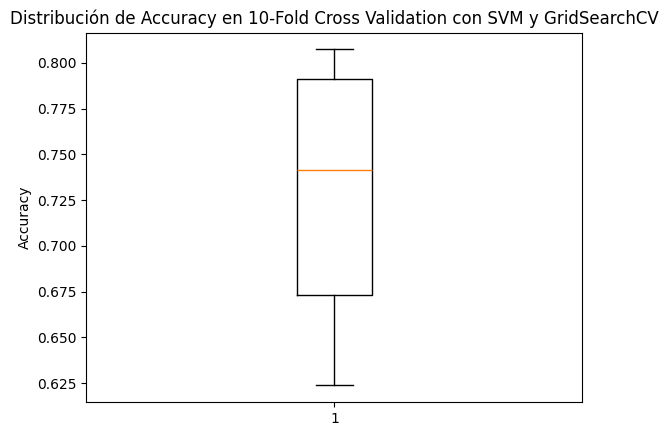

In [14]:
# Escalar los datos (opcional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir el modelo SVM
svm = SVC()

# Definir la rejilla de parámetros para RandomizedSearchCV
param_grid  = {
    'C': [1],  # Parámetro de regularización
    'kernel': ['rbf'],  # Tipo de kernel
    'gamma': ['scale'],  # Coeficiente del kernel 'rbf', 'poly' o 'sigmoid'
    'degree': [2,3,4],  # Grado del polinomio si se usa kernel 'poly'
    'coef0': [0.5555555555555556]  # Término independiente en el kernel 'poly' y 'sigmoid'
}

# Inicializar lista para almacenar accuracies
fold_accuracies = []

# Realizar la validación cruzada respetando los folds predefinidos
for fold in range(1, 11):  # Hay 10 folds en UrbanSound8K
    # Dividir el dataset en entrenamiento y prueba
    train_index = folds != fold
    test_index = folds == fold
    
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    with mlflow.start_run(run_name=f"SVM GSCV Fold_{fold}") as run:

        # Configurar GridSearchCV
        grid_search = GridSearchCV(
            estimator=svm, 
            param_grid=param_grid, 
            cv=10,  # Validación cruzada interna con 10 pliegues
            scoring='accuracy',  # Métrica para optimizar
            n_jobs=-1  # Usar todos los núcleos disponibles
        )

        # Entrenar el modelo con la búsqueda de hiperparámetros
        grid_search.fit(X_train, y_train)

        # Obtener el mejor modelo
        best_svm = grid_search.best_estimator_

        # Obtener los mejores parámetros y el mejor score
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        # Predecir y evaluar
        y_pred = best_svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

        print(f"Mejores Parámetros: {best_params}")
        print(f"Mejor Score: {best_score}")
        
        print(f"Fold {fold} Accuracy: {accuracy:.4f}")
        
        # Registrar los parámetros y métricas en MLflow
        mlflow.log_params(best_params)

        #mlflow.log_metric(f"best_cv_score_fold_{fold}", best_score)
        # Registrar la métrica de accuracy de este fold
        mlflow.log_metric(f"accuracy_score", accuracy)

        # Guardar el modelo en MLflow con un ejemplo de entrada
        input_example = X_test[:1]  # Ejemplo de entrada, una sola muestra de prueba
        mlflow.sklearn.log_model(best_svm, f"svm_model_fold_{fold}", input_example=input_example)

        # Se finaliza el registro
        mlflow.end_run()


# Mostrar el promedio y desviación estándar
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nAccuracy promedio: {mean_accuracy:.4f}")
print(f"Desviación estándar: {std_accuracy:.4f}")

# Opcional: Visualizar los resultados con un boxplot
plt.boxplot(fold_accuracies)
plt.title('Distribución de Accuracy en 10-Fold Cross Validation con SVM y GridSearchCV')
plt.ylabel('Accuracy')
plt.show()
